### Training the SNEE model

Setting up the environment

In [1]:
# Clone the repository
!git clone https://github.com/Ggenoni/SENN.git

Cloning into 'SENN'...
remote: Enumerating objects: 1853, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1853 (delta 103), reused 22 (delta 22), pack-reused 1700 (from 2)
Receiving objects: 100% (1853/1853), 26.18 MiB | 18.09 MiB/s, done.
Resolving deltas: 100% (1083/1083), done.


In [2]:
# Install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local/miniconda
import os
os.environ["PATH"] += ":/usr/local/miniconda/bin"

--2025-01-23 15:05:43--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147784736 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.94M   257MB/s    in 0.5s    

2025-01-23 15:05:44 (257 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [147784736/147784736]

PREFIX=/usr/local/miniconda
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that you

In [3]:
!conda --version

conda 24.11.1


In [4]:
# Change directory
%cd SENN

/content/SENN


In [5]:
# Create the virtual environment
!conda env create -f environment.yml

Output streaming troncato alle ultime 5000 righe.

scipy-1.7.3          | 21.6 MB   | :  51% 0.5071754215552446/1 [03:59<03:32, 432.19s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5086203657761998/1 [03:59<03:50, 469.13s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5100653099971549/1 [04:00<04:04, 498.43s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.51151025421811/1 [04:01<04:10, 513.09s/it]  






scipy-1.7.3          | 21.6 MB   | :  51% 0.5129551984390651/1 [04:02<04:27, 548.60s/it]






scipy-1.7.3          | 21.6 MB   | :  51% 0.5144001426600202/1 [04:03<04:54, 606.51s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5158450868809754/1 [04:04<05:39, 700.29s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5172900311019305/1 [04:05<05:17, 657.33s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5187349753228856/1 [04:06<05:35, 696.26s/it]






scipy-1.7.3          | 21.6 MB   | :  52% 0.5201799195438407/1 [04:07<05:25, 679.29s/it]







In [6]:
!source /usr/local/miniconda/bin/activate senn && which python

/usr/local/miniconda/envs/senn/bin/python


In [7]:
# ==> After running this cell in Colab, restart the runtime changing kernell <==

!source /usr/local/miniconda/bin/activate senn
!pip install ipykernel
!python -m ipykernel install --user --name=senn --display-name "Python (senn)"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00
Installed kernelspec senn in /root/.local/share/jupyter/kernels/senn


In [1]:
# Check for plt.style.use strings in the code
import os

def search_in_files(directory, search_string):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".py"):  # Search only in Python files
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    for i, line in enumerate(f):
                        if search_string in line:
                            print(f"Found in {file_path}, line {i + 1}: {line.strip()}")

# Replace '.' with the directory you want to search (e.g., '/content/SENN')
search_in_files('/content/SENN', 'plt.style.use')


Found in /content/SENN/senn/trainer.py, line 25: #plt.style.use('seaborn-talk')
Found in /content/SENN/senn/utils/plot_utils.py, line 17: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/utils/plot_utils.py, line 231: #plt.style.use('seaborn-paper')
Found in /content/SENN/senn/models/senn.py, line 254: #plt.style.use('seaborn-paper')


In [2]:
# Add the style file
!mkdir -p ~/.config/matplotlib/stylelib/
!echo -e "axes.titlesize: 18\naxes.labelsize: 14\nfigure.dpi: 100" > ~/.config/matplotlib/stylelib/seaborn-paper.mplstyle


Training the model

In [11]:
%cd SENN

/content/SENN


In [12]:
# Train the model with our config file

!source /usr/local/miniconda/bin/activate senn && python main.py --config configs/config.json

 EXPERIMENT: mnist_lambda1e-4_seed29
{'aggregator': 'SumAggregator',
 'batch_size': 200,
 'cl_sizes': [1, 10, 20],
 'concept_dim': 1,
 'concept_reg': 1,
 'conceptizer': 'ConvConceptizer',
 'data_path': 'datasets/data/mnist_data',
 'dataloader': 'mnist',
 'device': 'cpu',
 'dropout': 0.5,
 'epochs': 5,
 'eval_freq': 270,
 'exp_name': 'mnist_lambda1e-4_seed29',
 'hidden_sizes': [320, 50],
 'image_size': 28,
 'lr': 0.0002,
 'manual_seed': 29,
 'num_classes': 10,
 'num_concepts': 5,
 'parameterizer': 'ConvParameterizer',
 'print_freq': 100,
 'robust_reg': 0.0001,
 'robustness_loss': 'mnist_robustness_loss',
 'sparsity_reg': 2e-05,
 'train': True}
Using device cpu
Loading data ...
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to datasets/data/mnist_data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>

100.0%
Extracting datasets/data/

In [38]:
import json
import torch
import numpy as np
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from pathlib import Path
from types import SimpleNamespace
from importlib import import_module

In [51]:
from senn.models.losses import *
from senn.models.parameterizers import *
from senn.models.conceptizers import *
from senn.models.aggregators import *
from senn.models.senn import SENN, DiSENN

In [40]:
from senn.datasets.dataloaders import get_dataloader
from senn.utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot


In [41]:
from senn.datasets.dataloaders import get_dataloader
from senn.utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot


In [42]:
def load_checkpoint(config):
    model_file = Path('results') / config.exp_name / "checkpoints" / "best_model.pt"
    return torch.load(model_file, config.device)


In [44]:
def get_config(filename):
    config_path = Path('configs')
    config_file = config_path / filename
    with open(config_file, 'r') as f:
        config = json.load(f)

    return SimpleNamespace(**config)

In [45]:
def accuracy(model, dataloader, config):
    accuracies = []
    model.eval()
    with torch.no_grad():
        for i, (x, labels) in enumerate(dataloader):
            x = x.float().to(config.device)
            labels = labels.long().to(config.device)
            y_pred, (concepts, relevances), _ = model(x)
            accuracies.append((y_pred.argmax(axis=1) == labels).float().mean().item())
    accuracy = np.array(accuracies).mean()
    print(f"Test Mean Accuracy: {accuracy * 100: .3f} %")


In [46]:
mnist_config = get_config("config.json")
#mnist_config.device = "cpu"

In [47]:
_, _, mnist_test_dl = get_dataloader(mnist_config)

In [52]:
conceptizer = ConvConceptizer(**mnist_config.__dict__)
parameterizer = ConvParameterizer(**mnist_config.__dict__)
aggregator = SumAggregator(**mnist_config.__dict__)

mnist_SENN = SENN(conceptizer, parameterizer, aggregator)


In [53]:
mnist_checkpoint = load_checkpoint(mnist_config)
mnist_SENN.load_state_dict(mnist_checkpoint['model_state'])


<ipython-input-43-b45a5eb91e0b>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(model_file, config.device)


<All keys matched successfully>

In [54]:
accuracy(mnist_SENN, mnist_test_dl, mnist_config)


Test Mean Accuracy:  93.810 %


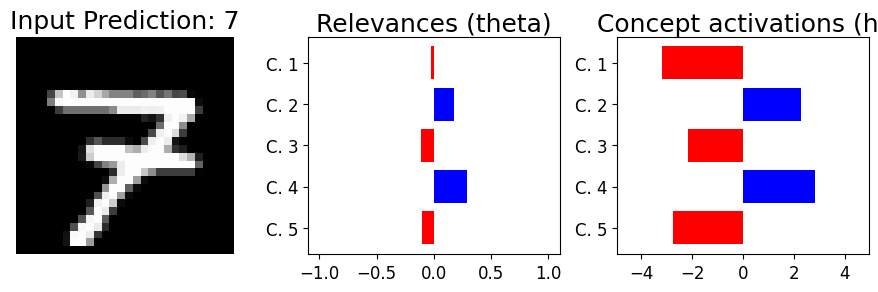

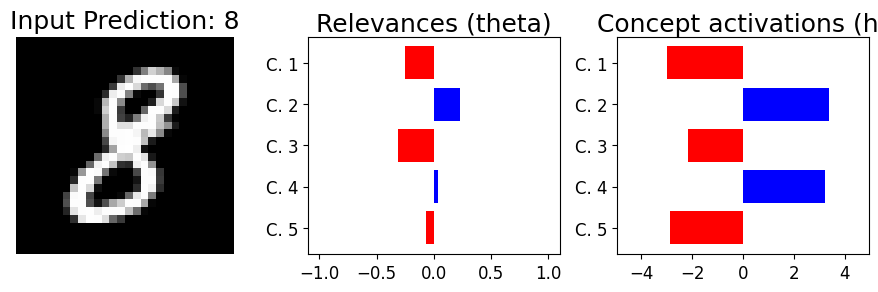

In [55]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


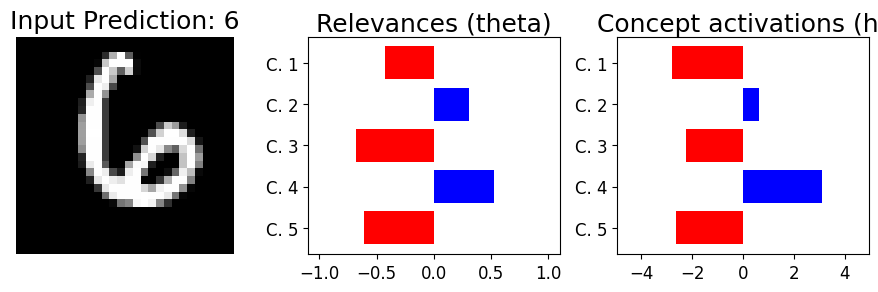

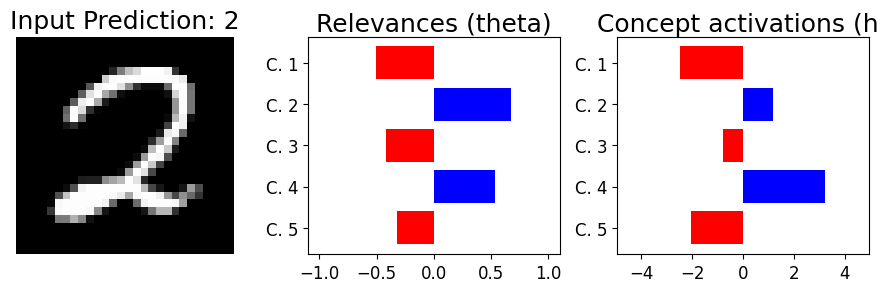

In [57]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


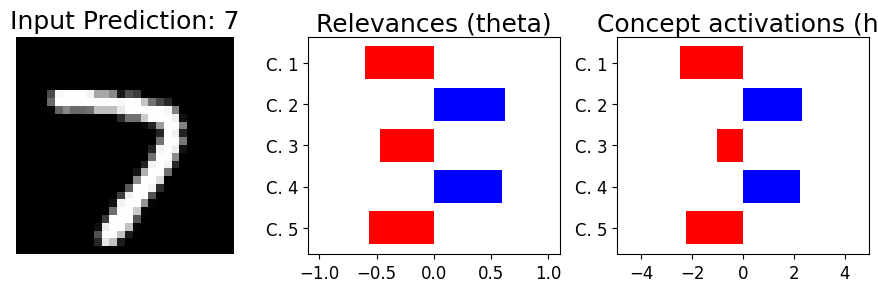

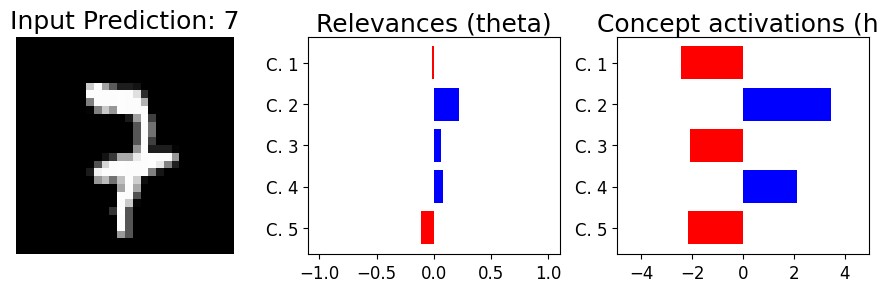

In [58]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


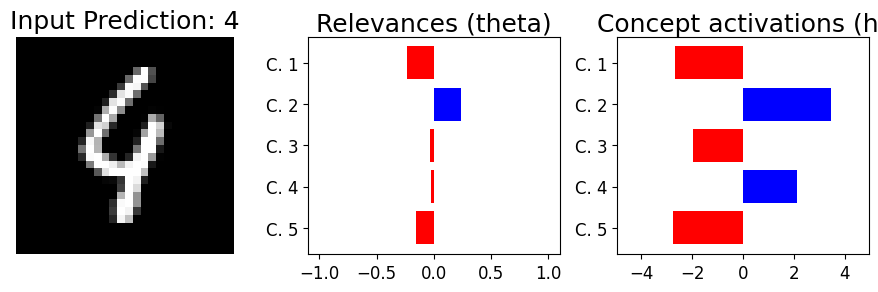

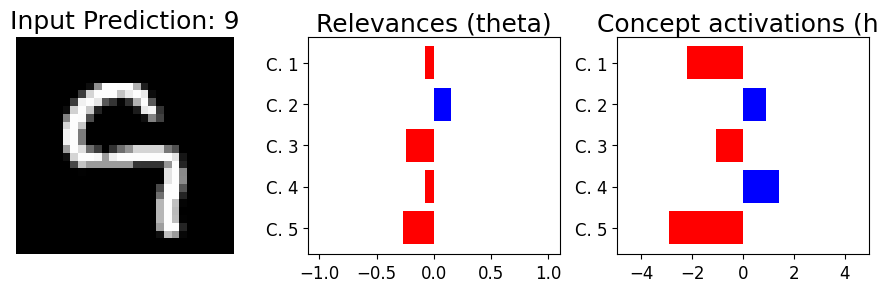

In [59]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


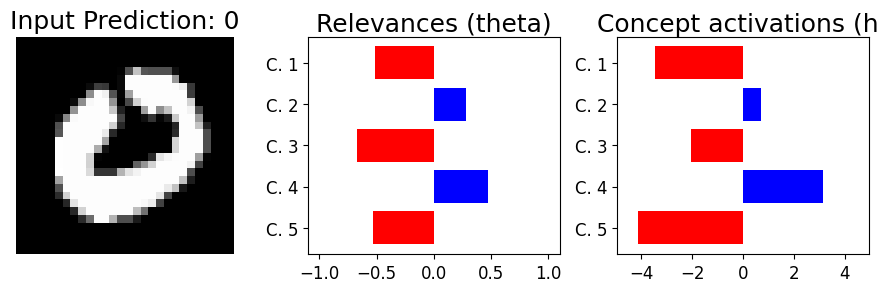

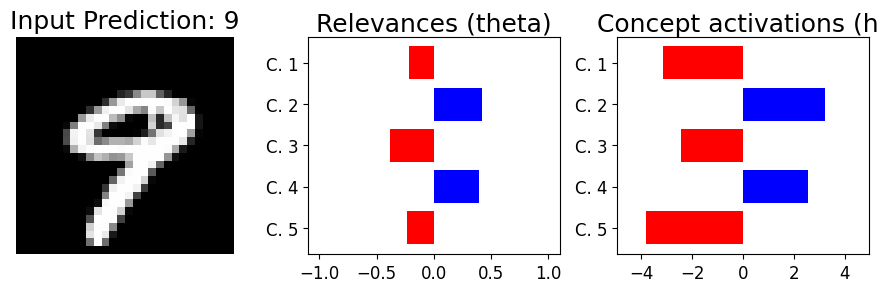

In [60]:
show_explainations(mnist_SENN, mnist_test_dl, 'mnist')


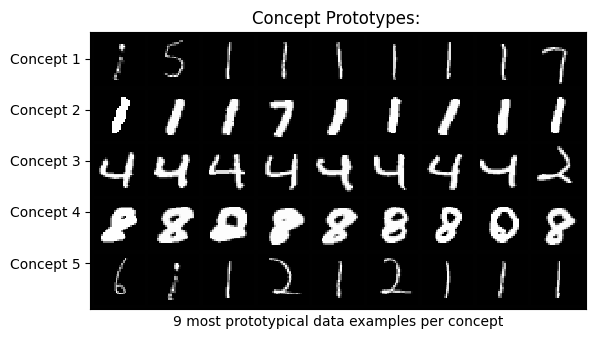

<Figure size 640x480 with 0 Axes>

In [56]:
show_prototypes(mnist_SENN, mnist_test_dl, 'activation')


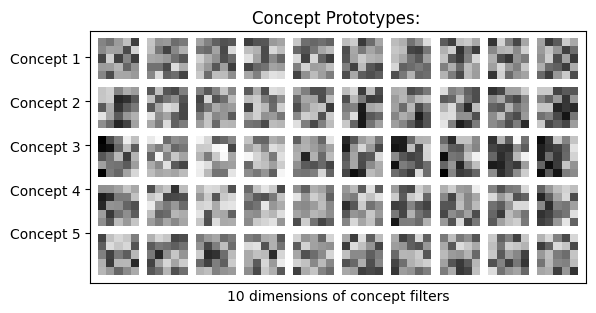

<Figure size 640x480 with 0 Axes>

In [61]:
show_prototypes(mnist_SENN, mnist_test_dl, 'filter')